Лабораторная работа №5. Применение сверточных нейронных сетей (бинарная классификация)
Данные: Набор данных DogsVsCats, который состоит из изображений различной размерности, содержащих фотографии собак и кошек. Обучающая выборка включает в себя 25 тыс. изображений (12,5 тыс. кошек: cat.0.jpg, …, cat.12499.jpg и 12,5 тыс. собак: dog.0.jpg, …, dog.12499.jpg), а контрольная выборка содержит 12,5 тыс. неразмеченных изображений. Скачать данные, а также проверить качество классификатора на тестовой выборке можно на сайте Kaggle -> https://www.kaggle.com/c/dogs-vs-cats/data

Задание 1.
Загрузите данные. Разделите исходный набор данных на обучающую, валидационную и контрольную выборки.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
mkdir 5_cats_dogs

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/5_lab/Archive.zip' -d 5_cats_dogs

Streaming output truncated to the last 5000 lines.
  inflating: 5_cats_dogs/__MACOSX/train/._cat.183.jpg  
  inflating: 5_cats_dogs/train/cat.2677.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._cat.2677.jpg  
  inflating: 5_cats_dogs/train/cat.6411.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._cat.6411.jpg  
  inflating: 5_cats_dogs/train/dog.4744.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._dog.4744.jpg  
  inflating: 5_cats_dogs/train/cat.9722.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._cat.9722.jpg  
  inflating: 5_cats_dogs/train/dog.10373.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._dog.10373.jpg  
  inflating: 5_cats_dogs/train/dog.2335.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._dog.2335.jpg  
  inflating: 5_cats_dogs/train/dog.2453.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._dog.2453.jpg  
  inflating: 5_cats_dogs/train/cat.7069.jpg  
  inflating: 5_cats_dogs/__MACOSX/train/._cat.7069.jpg  
  inflating: 5_cats_dogs/train/dog.10415.jpg  
  inflating: 5_cats_

In [0]:
cd 5_cats_dogs/

/content/5_cats_dogs


In [0]:
IMG_WIDTH=128
IMG_HEIGHT=128
IMG_SIZE=(IMG_WIDTH, IMG_HEIGHT)
EPOCH_COUNT=15

In [0]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
df = pd.DataFrame(
      data=[
          [os.path.basename(img_path), 'dog' if 'dog' in os.path.basename(img_path) else 'cat']
          for img_path in glob.glob('./train/*.jpg')
      ],
      columns=['filename', 'category'])
df.head()

filename category
0  dog.3062.jpg      dog
1   dog.954.jpg      dog
2  cat.5062.jpg      cat
3  cat.7989.jpg      cat
4  cat.2714.jpg      cat

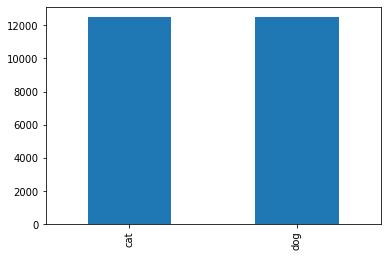

In [0]:
df['category'].value_counts().plot.bar()

In [0]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df, test_size=0.2)
val_df, test_df = train_test_split(val_df, test_size=0.5)

len(train_df), len(val_df), len(test_df)

(20000, 2500, 2500)

Задание 2.
Реализуйте глубокую нейронную сеть с как минимум тремя сверточными слоями. Какое качество классификации получено?


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, BatchNormalization, Dropout, Flatten

def get_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [0]:
model = get_model()  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size=64

def create_generator(df, batch_size=batch_size):
    img_generator = ImageDataGenerator(rescale=1./255)
    return img_generator.flow_from_dataframe(
        df, 
        directory='./train/',
        x_col='filename',
        y_col='category',
        target_size=IMG_SIZE, 
        class_mode='binary',
        batch_size=batch_size,
        shuffle=True)

In [0]:
train_generator = create_generator(train_df)
val_generator = create_generator(val_df)
test_generator = create_generator(test_df)

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [0]:
def plot_accuracy_and_loss(fit_hist):
    epoch_count = len(fit_hist.history['accuracy'])
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Loss')
    ax1.legend(['train', 'val'])

    ax2.plot(history.history['accuracy'])
    ax2.plot(history.history['val_accuracy'])
    ax2.set_title('Accuracy')
    ax2.legend(['train', 'val'])
    plt.show()

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
313/312 [==============================] - 63s 201ms/step - loss: 0.6887 - accuracy: 0.6696 - val_loss: 0.6955 - val_accuracy: 0.6012
Epoch 2/15
313/312 [==============================] - 62s 198ms/step - loss: 0.5031 - accuracy: 0.7556 - val_loss: 0.4720 - val_accuracy: 0.7652
Epoch 3/15
313/312 [==============================] - 62s 198ms/step - loss: 0.4320 - accuracy: 0.8009 - val_loss: 0.4798 - val_accuracy: 0.7736
Epoch 4/15
313/312 [==============================] - 62s 198ms/step - loss: 0.3871 - accuracy: 0.8258 - val_loss: 0.8217 - val_accuracy: 0.7112
Epoch 5/15
313/312 [==============================] - 62s 198ms/step - loss: 0.3395 - accuracy: 0.8493 - val_loss: 0.8219 - val_accuracy: 0.7056
Epoch 6/15
313/312 [==============================] - 62s 197ms/step - loss: 0.2973 - accuracy: 0.8721 - val_loss: 0.4030 - val_accuracy: 0.8248
Epoch 7/15
313/312 [==============================] - 

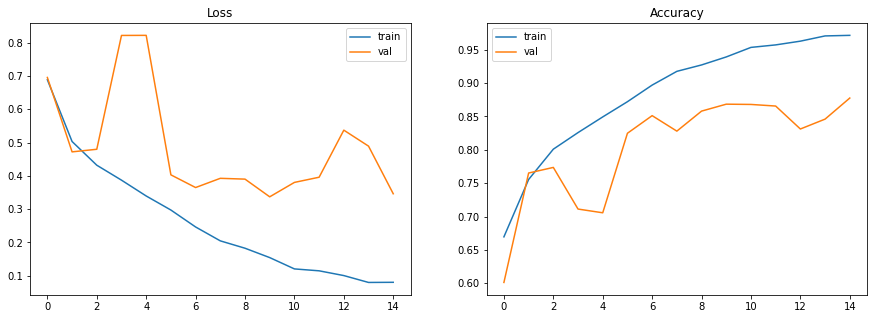

40/39 [==============================] - 6s 156ms/step - loss: 0.4014 - accuracy: 0.8756


[0.4014194905757904, 0.8755999803543091]

In [0]:
model = get_model()
model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = model.fit_generator(
    train_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_generator,
    steps_per_epoch=len(train_df) / batch_size, 
    validation_steps=len(val_df) / batch_size)

plot_accuracy_and_loss(history)
model.evaluate(iter(test_generator), steps=len(test_df) / batch_size)

Задание 3.
Примените дополнение данных (data augmentation). Как это повлияло на качество классификатора? 


In [0]:
img_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

def create_aug_generator(df, batch_size=batch_size):
    return img_generator.flow_from_dataframe(
        df, 
        directory='./train/',
        x_col='filename',
        y_col='category',
        target_size=IMG_SIZE, 
        class_mode='binary',
        batch_size=batch_size,
        shuffle=True)
    
def create_plot_aug_generator(df, batch_size=batch_size):
    return img_generator.flow_from_dataframe(
        df, 
        directory='./train/',
        x_col='filename',
        y_col='category',
        target_size=IMG_SIZE, 
        class_mode='categorical',
        batch_size=batch_size)

In [0]:
train_aug_generator = create_aug_generator(train_df)
val_aug_generator = create_aug_generator(val_df)

Found 20000 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


In [0]:
plot_generator = create_plot_aug_generator(train_df.sample())
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, _ in plot_generator:
        plt.imshow(X_batch[0])
        break
plt.axis('off')
plt.tight_layout()
plt.show()

Found 1 validated image filenames belonging to 1 classes.


Epoch 1/15
313/312 [==============================] - 132s 421ms/step - loss: 0.7407 - accuracy: 0.6407 - val_loss: 1.9755 - val_accuracy: 0.5140
Epoch 2/15
313/312 [==============================] - 132s 421ms/step - loss: 0.5689 - accuracy: 0.7106 - val_loss: 0.5954 - val_accuracy: 0.6976
Epoch 3/15
313/312 [==============================] - 131s 420ms/step - loss: 0.5022 - accuracy: 0.7558 - val_loss: 0.5224 - val_accuracy: 0.7332
Epoch 4/15
313/312 [==============================] - 131s 418ms/step - loss: 0.4522 - accuracy: 0.7869 - val_loss: 0.4308 - val_accuracy: 0.7924
Epoch 5/15
313/312 [==============================] - 131s 418ms/step - loss: 0.4251 - accuracy: 0.8023 - val_loss: 0.4949 - val_accuracy: 0.7664
Epoch 6/15
313/312 [==============================] - 130s 416ms/step - loss: 0.3995 - accuracy: 0.8196 - val_loss: 0.4810 - val_accuracy: 0.7936
Epoch 7/15
313/312 [==============================] - 131s 417ms/step - loss: 0.3811 - accuracy: 0.8305 - val_loss: 0.5494 -

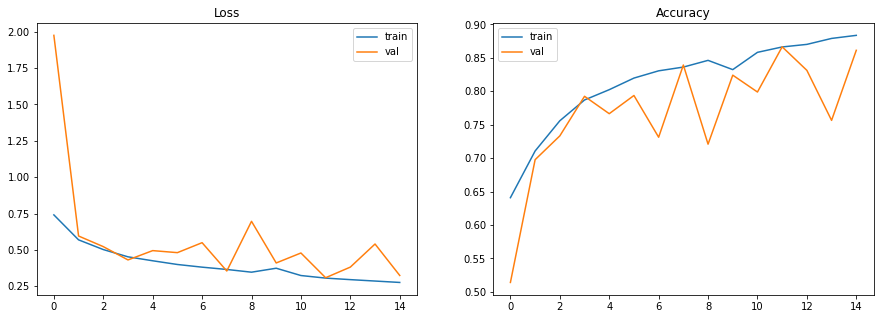

40/39 [==============================] - 6s 155ms/step - loss: 0.2581 - accuracy: 0.8904


[0.2581421434879303, 0.8903999924659729]

In [0]:
aug_model = get_model()
aug_model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = aug_model.fit_generator(
    train_aug_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_aug_generator,
    steps_per_epoch=len(train_df) / batch_size, 
    validation_steps=len(val_df) / batch_size)

plot_accuracy_and_loss(history)
aug_model.evaluate(iter(test_generator), steps=len(test_df) / batch_size)

The accuracy of the model has slightly increased (~1.5%). 
The model is not as overfitted as it was in the previous time.

Задание 4. Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора? Какой максимальный результат удалось получить на сайте Kaggle? Почему?

In [0]:
from tensorflow.keras.applications import VGG16

vgg16_model = VGG16(input_shape=(IMG_WIDTH, IMG_HEIGHT, 3), include_top=False)
vgg16_model.trainable = False
vgg16_model.summary()

KeyboardInterrupt: ignored

In [0]:
def get_pretrained_model():
    model = Sequential()
    for layer in vgg16_model.layers:
        model.add(layer)
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    return model

In [0]:
pretrained_model = get_pretrained_model()
pretrained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 32, 32, 256)      

In [0]:
pretrained_model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)  
history = pretrained_model.fit_generator(
    train_aug_generator,
    epochs=EPOCH_COUNT,
    validation_data=val_aug_generator,
    steps_per_epoch=len(train_df) / batch_size, 
    validation_steps=len(val_df) / batch_size)

plot_accuracy_and_loss(history)
pretrained_model.evaluate(iter(test_generator), steps=len(test_df) / batch_size)

Epoch 1/15
313/312 [==============================] - 135s 431ms/step - loss: 0.3578 - accuracy: 0.8457 - val_loss: 0.2772 - val_accuracy: 0.8832
Epoch 2/15
313/312 [==============================] - 135s 431ms/step - loss: 0.2873 - accuracy: 0.8767 - val_loss: 0.3365 - val_accuracy: 0.8648
Epoch 3/15
313/312 [==============================] - 135s 432ms/step - loss: 0.2678 - accuracy: 0.8856 - val_loss: 0.2734 - val_accuracy: 0.8808
Epoch 4/15
313/312 [==============================] - 138s 440ms/step - loss: 0.2679 - accuracy: 0.8849 - val_loss: 0.3226 - val_accuracy: 0.8644
Epoch 5/15
313/312 [==============================] - 139s 444ms/step - loss: 0.2638 - accuracy: 0.8877 - val_loss: 0.2661 - val_accuracy: 0.8808
Epoch 6/15
313/312 [==============================] - 140s 447ms/step - loss: 0.2623 - accuracy: 0.8888 - val_loss: 0.2450 - val_accuracy: 0.8980
Epoch 7/15
313/312 [==============================] - 138s 442ms/step - loss: 0.2571 - accuracy: 0.8906 - val_loss: 0.2753 -

40/39 [==============================] - 7s 185ms/step - loss: 0.2305 - accuracy: 0.9052


[0.23048847913742065, 0.9052000045776367]

The accuracy is 90,5%.
I am positive that if we continue to fit the model, the accuracy will be higher.